In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import optimize

import constants as const

plt.style.use('science')

In [2]:
lo = np.loadtxt('spectra_local_lo_a0_fix.txt')
nlo = np.loadtxt('spectra_local_nlo_a0_B6_fix.txt')
mm = np.loadtxt('spectra_Mott_Massey.txt')

In [3]:
def convergence(lamb, c1, c2):
    return c1 * (1 + c2*(1/lamb))


def convergence2(lamb, c1, c2):
    return c1 * (1 + c2*(1/lamb)**2)

In [4]:
lo_asymp = np.zeros(7)
nlo_asymp = np.zeros(7)

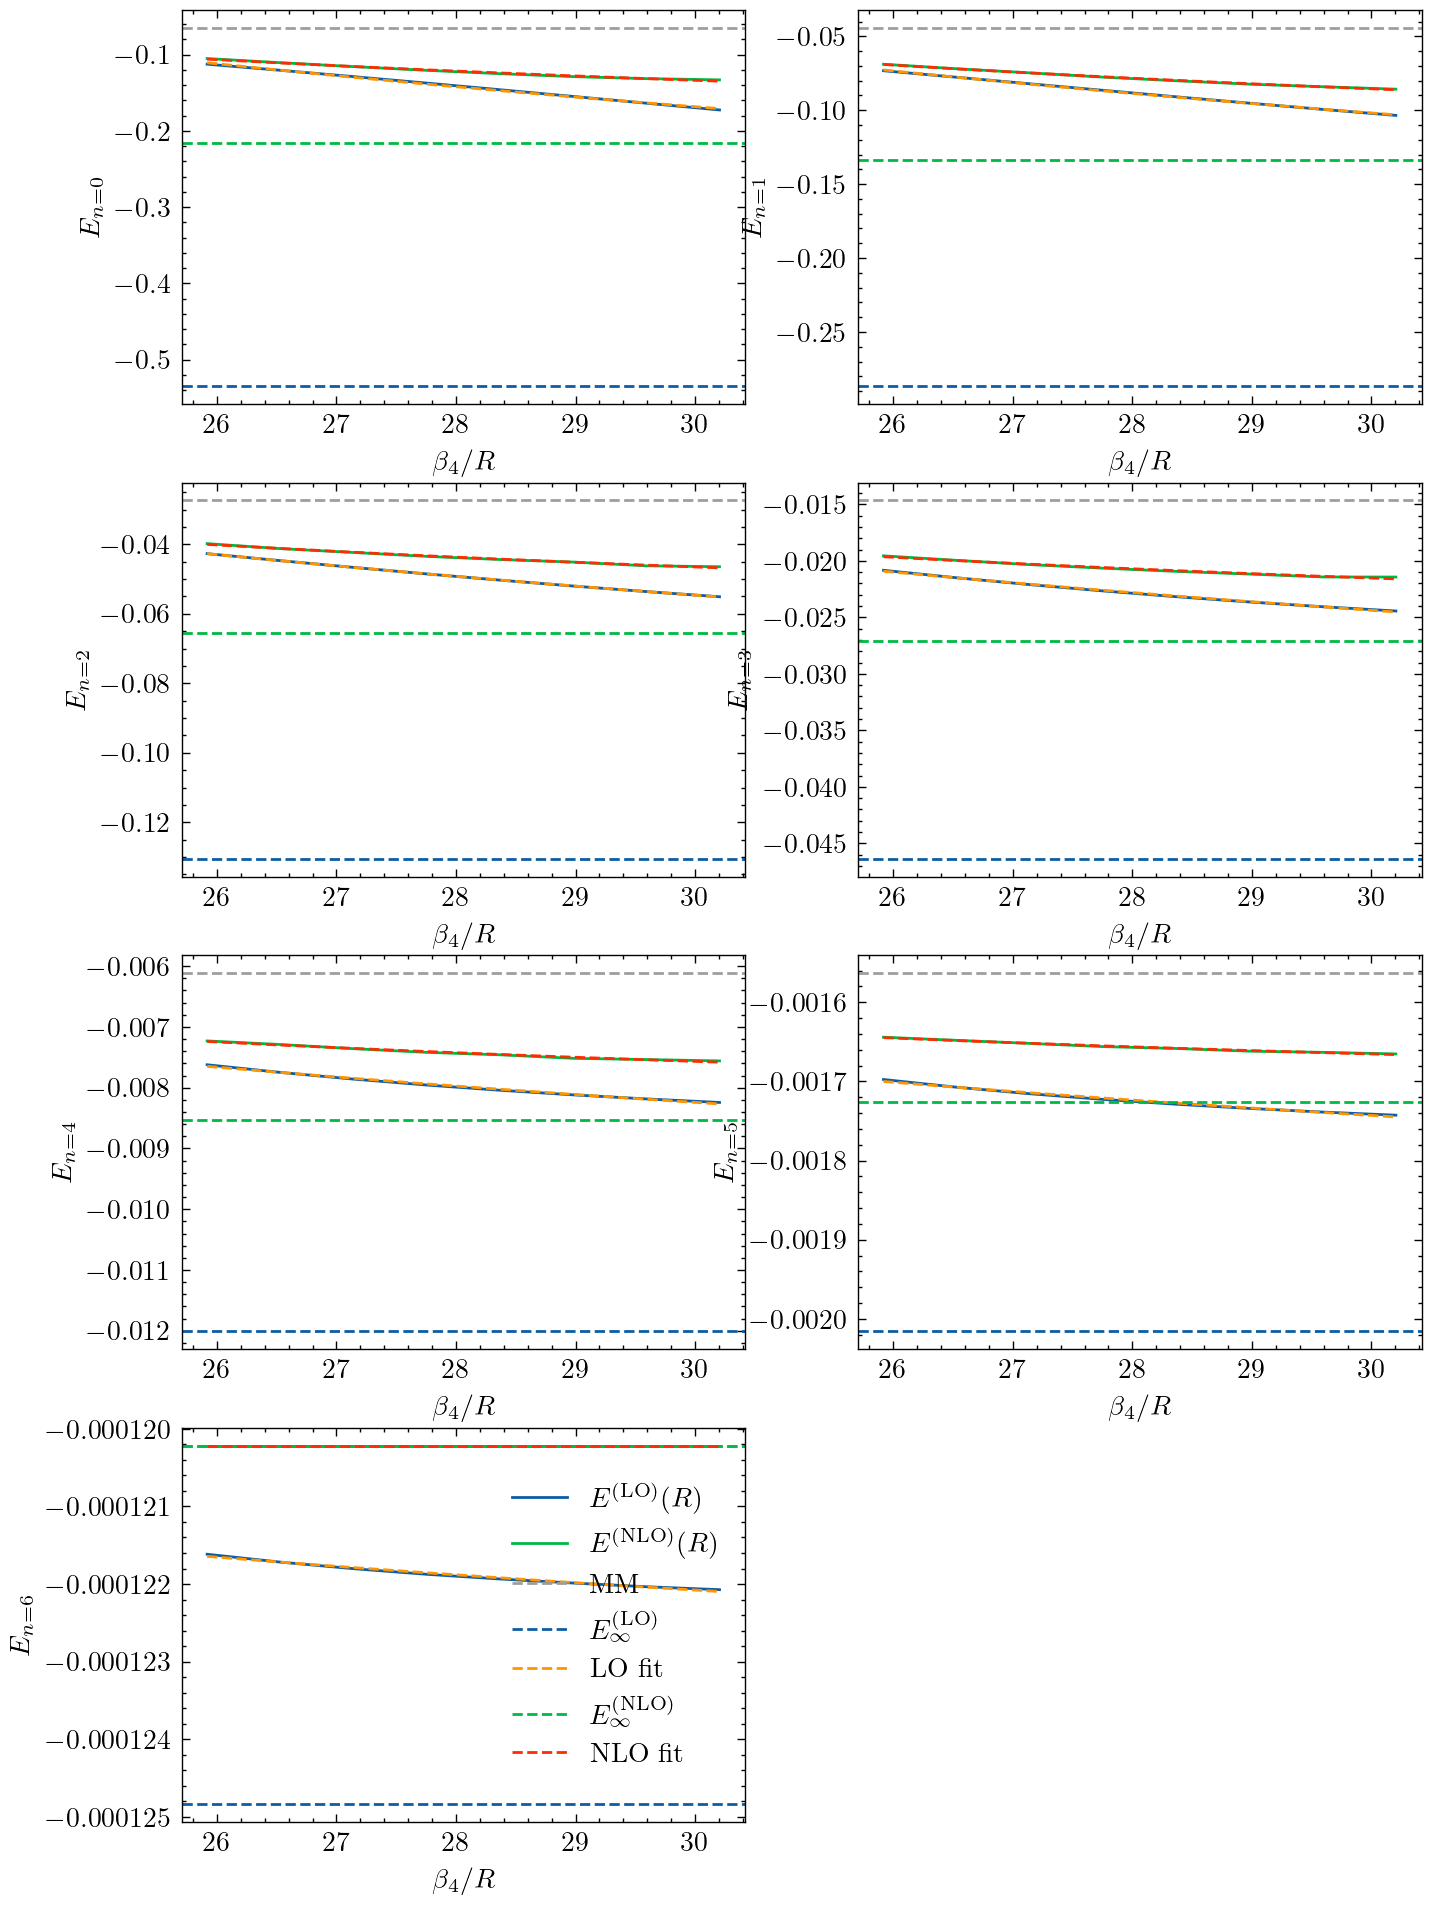

In [5]:
fig, ax = plt.subplots(4, 2, figsize=(2*4, 4*3), dpi=200)
fig.patch.set_facecolor('white')
fig.delaxes(ax[3, 1])

num_pts = 8
stop = np.argmin(np.abs(const.BETA4/lo[:, 0] - 30)) + 1

for k in range(7):
    i = k//2
    j = k%2
    ax[i, j].plot(const.BETA4/lo[stop-num_pts:stop, 0], lo[stop-num_pts:stop, k+1], label=r'$E^{({\rm LO})}(R)$')
    ax[i, j].plot(const.BETA4/nlo[stop-num_pts:stop, 0], nlo[stop-num_pts:stop, k+1], label=r'$E^{({\rm NLO})}(R)$')
    ax[i, j].axhline(mm[k], linestyle='--', color='C6', label='MM')
    
    par, cov = optimize.curve_fit(convergence, const.BETA4/lo[stop-num_pts:stop, 0], lo[stop-num_pts:stop, k+1])
    ax[i, j].axhline(par[0], color='C0', linestyle='--', label=r'$E_\infty^{({\rm LO})}$')
    ax[i, j].plot(const.BETA4/lo[stop-num_pts:stop, 0], convergence(const.BETA4/lo[stop-num_pts:stop, 0], *par),
                  linestyle='--', label='LO fit')
    lo_asymp[k] = par[0]
    
    par, cov = optimize.curve_fit(convergence2, const.BETA4/nlo[stop-num_pts:stop, 0], nlo[stop-num_pts:stop, k+1])
    ax[i, j].axhline(par[0], color='C1', linestyle='--', label=r'$E_\infty^{({\rm NLO})}$')
    ax[i, j].plot(const.BETA4/lo[stop-num_pts:stop, 0], convergence2(const.BETA4/lo[stop-num_pts:stop, 0], *par),
                  linestyle='--', label='NLO fit')
    nlo_asymp[k] = par[0]
    
    ax[i, j].set_ylabel(r'$E_{n=%d}$' % (k))
    ax[i, j].set_xlabel(r'$\beta_4/R$')
    if k == 6:
        ax[i, j].legend()
    
#     f = interp1d(const.BETA4/lo[-num_pts:, 0], lo[-num_pts:, k+1], kind='cubic', fill_value='extrapolate')
#     ax[i, j].scatter(50, f(50))
    
#     g = interp1d(const.BETA4/nlo[-num_pts:, 0], nlo[-num_pts:, k+1], kind='cubic', fill_value='extrapolate')
#     ax[i, j].scatter(50, g(50))
    

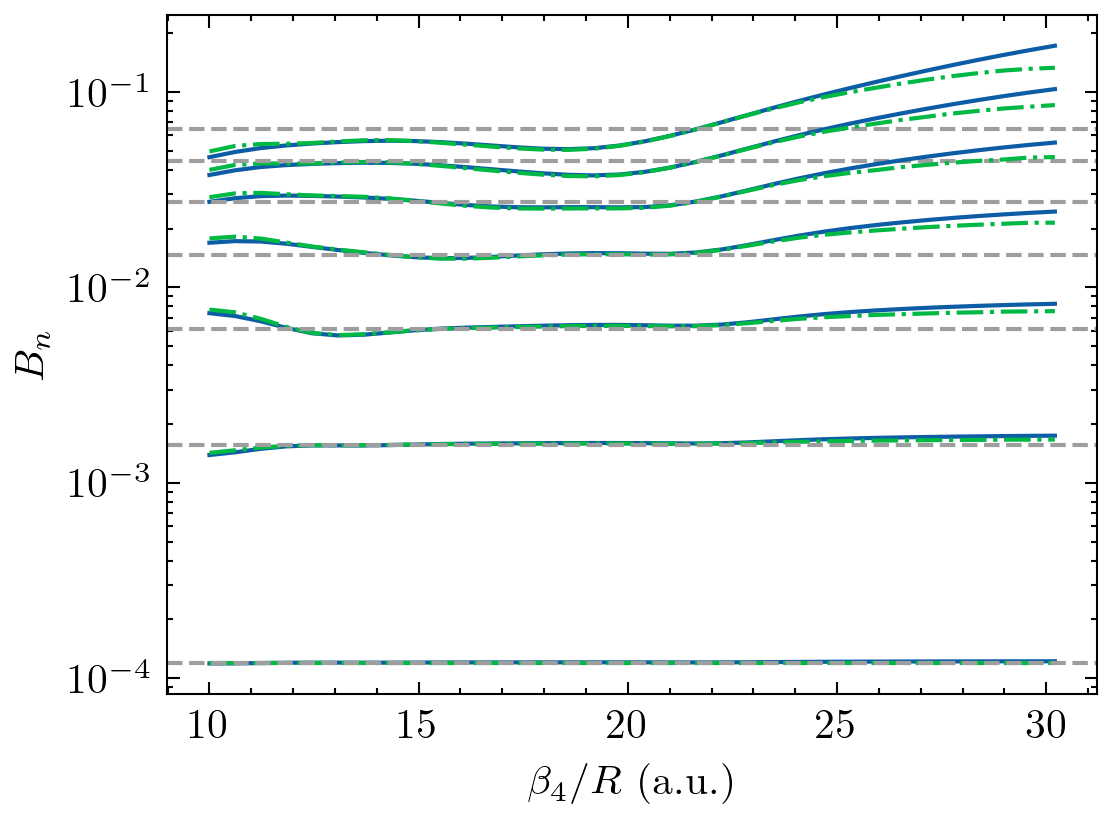

In [6]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
fig.patch.set_facecolor('white')

num_pts = 34
stop = np.argmin(np.abs(const.BETA4/lo[:, 0] - 30)) + 1

for k in range(7):
    i = k//2
    j = k%2
    ax.plot(const.BETA4/lo[stop-num_pts:stop, 0], -lo[stop-num_pts:stop, k+1], label=r'$E^{({\rm LO})}(R)$',
            color='C0')
    ax.plot(const.BETA4/nlo[stop-num_pts:stop, 0], -nlo[stop-num_pts:stop, k+1], label=r'$E^{({\rm NLO})}(R)$',
            color='C1', linestyle='-.')
    ax.axhline(-mm[k], linestyle='--', color='C6', label='MM')
    ax.set_yscale('log')
#     par, cov = optimize.curve_fit(convergence, const.BETA4/lo[stop-num_pts:stop, 0], lo[stop-num_pts:stop, k+1])
#     ax[i, j].axhline(par[0], color='C0', linestyle='--', label=r'$E_\infty^{({\rm LO})}$')
#     ax[i, j].plot(const.BETA4/lo[stop-num_pts:stop, 0], convergence(const.BETA4/lo[stop-num_pts:stop, 0], *par),
#                   linestyle='--', label='LO fit')
#     lo_asymp[k] = par[0]
    
#     par, cov = optimize.curve_fit(convergence2, const.BETA4/nlo[stop-num_pts:stop, 0], nlo[stop-num_pts:stop, k+1])
#     ax[i, j].axhline(par[0], color='C1', linestyle='--', label=r'$E_\infty^{({\rm NLO})}$')
#     ax[i, j].plot(const.BETA4/lo[stop-num_pts:stop, 0], convergence2(const.BETA4/lo[stop-num_pts:stop, 0], *par),
#                   linestyle='--', label='NLO fit')
#     nlo_asymp[k] = par[0]
    
    ax.set_ylabel(r'$B_{n}$')
    ax.set_xlabel(r'$\beta_4/R$ (a.u.)')
#     if k == 6:
#         ax[i, j].legend()
    
#     f = interp1d(const.BETA4/lo[-num_pts:, 0], lo[-num_pts:, k+1], kind='cubic', fill_value='extrapolate')
#     ax[i, j].scatter(50, f(50))
    
#     g = interp1d(const.BETA4/nlo[-num_pts:, 0], nlo[-num_pts:, k+1], kind='cubic', fill_value='extrapolate')
#     ax[i, j].scatter(50, g(50))

plt.savefig('figures/lo_nlo_spectrum_R.pdf')

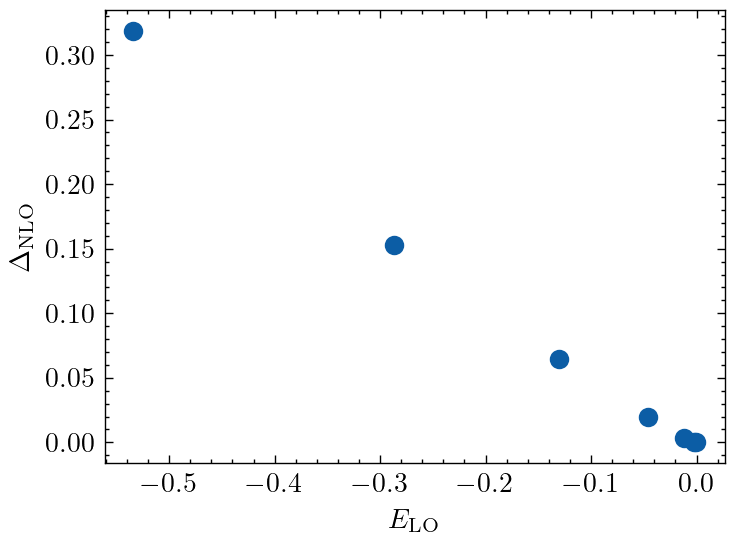

In [7]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
fig.patch.set_facecolor('white')

ax.scatter(lo_asymp, nlo_asymp - lo_asymp)

ax.set_xlabel(r'$E_{\rm LO}$')
ax.set_ylabel(r'$\Delta_{\rm NLO}$');

In [24]:
for (e_lo, e_nlo, e_mm) in zip(lo_asymp[::-1], nlo_asymp[::-1], mm[::-1]):
    print(r'%.2e & %.2e & %.2e \\' % (-e_mm, -e_lo, -e_nlo))

1.20e-04 & 1.25e-04 & 1.20e-04 \\
1.56e-03 & 2.02e-03 & 1.73e-03 \\
6.12e-03 & 1.20e-02 & 8.53e-03 \\
1.47e-02 & 4.63e-02 & 2.71e-02 \\
2.74e-02 & 1.30e-01 & 6.56e-02 \\
4.42e-02 & 2.86e-01 & 1.34e-01 \\
6.48e-02 & 5.34e-01 & 2.16e-01 \\


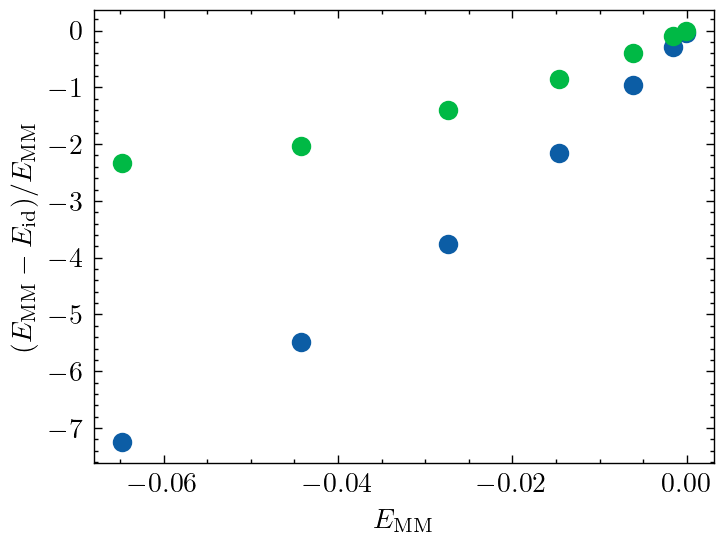

In [8]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
fig.patch.set_facecolor('white')

ax.scatter(mm, (mm - lo_asymp)/mm)
ax.scatter(mm, (mm - nlo_asymp)/mm)
# ax.axvline(-1/(2*const.MU*5**2))

ax.set_xlabel(r'$E_{\rm MM}$')
ax.set_ylabel(r'$(E_{\rm MM} - E_{\rm id})/E_{\rm MM}$');

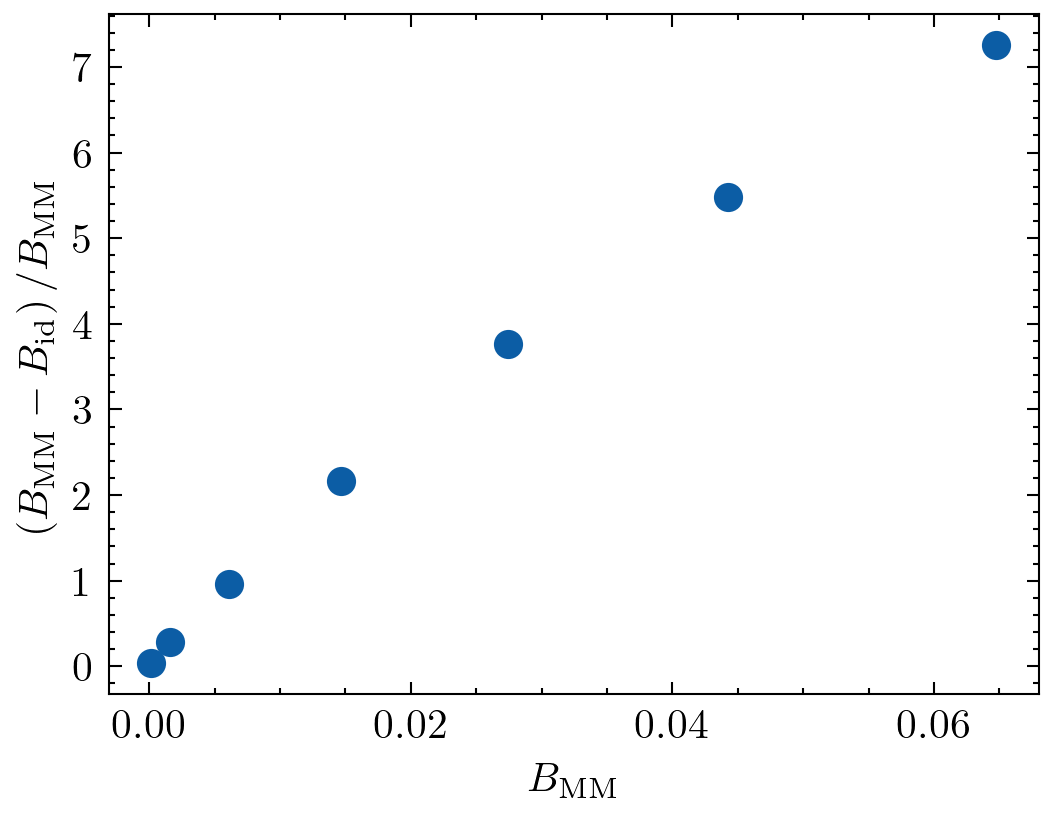

In [36]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
fig.patch.set_facecolor('white')

ax.plot(np.abs(mm), np.abs((mm - lo_asymp)/mm), marker='o', linestyle='', label='LO')
# ax.loglog(np.abs(mm[:-1]), np.abs((mm[:-1] - nlo_asymp[:-1])/mm[:-1]), marker='o', linestyle='', label='NLO')
# ax.axvline(-1/(2*const.MU*5**2))

# ax.legend()
ax.set_xlabel(r'$B_{\rm MM}$')
ax.set_ylabel(r'$\left( B_{\rm MM} - B_{\rm id} \right)/B_{\rm MM}$');

plt.savefig('figures/lo_error.pdf')

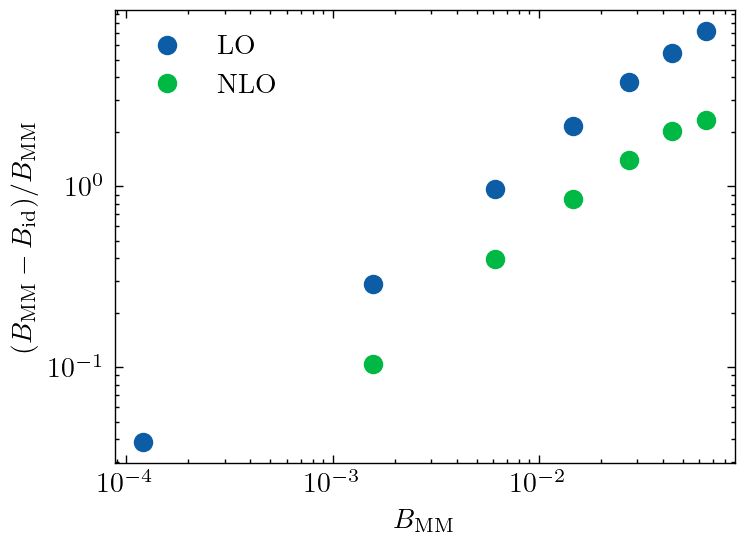

In [37]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
fig.patch.set_facecolor('white')

ax.loglog(np.abs(mm), np.abs((mm - lo_asymp)/mm), marker='o', linestyle='', label='LO')
ax.loglog(np.abs(mm[:-1]), np.abs((mm[:-1] - nlo_asymp[:-1])/mm[:-1]), marker='o', linestyle='', label='NLO')
# ax.axvline(-1/(2*const.MU*5**2))

ax.legend()
ax.set_xlabel(r'$B_{\rm MM}$')
ax.set_ylabel(r'$(B_{\rm MM} - B_{\rm id})/B_{\rm MM}$');

In [38]:
par_lo, cov_lo = optimize.curve_fit(lambda x, m, b: m*x+b,
                                    np.log(np.abs(mm)),
                                    np.log(np.abs((mm - lo_asymp)/mm)))
par_lo

array([0.84547474, 4.31499749])

In [39]:
par_nlo, cov_nlo = optimize.curve_fit(lambda x, m, b: m*x+b,
                              np.log(np.abs(mm[2:-1])),
                              np.log(np.abs((mm[2:-1] - nlo_asymp[2:-1])/mm[2:-1]))
                             )
par_nlo

array([0.90984472, 3.65141522])

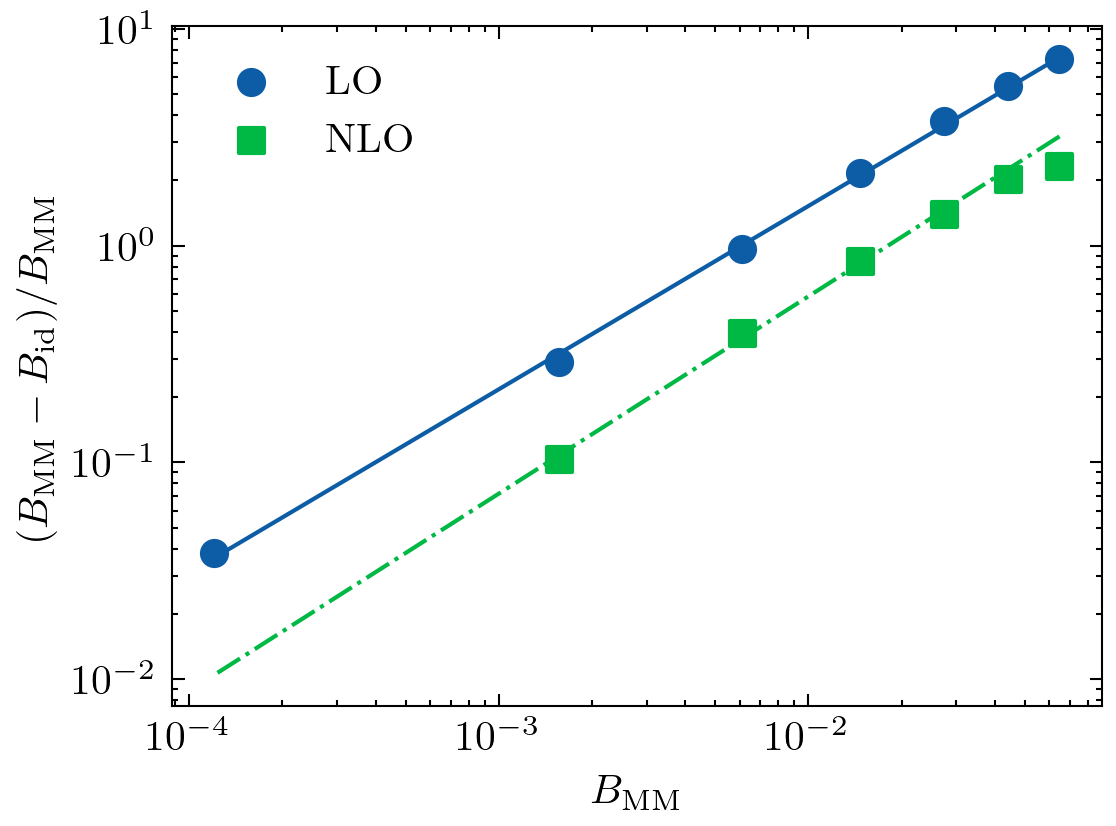

In [45]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
fig.patch.set_facecolor('white')

ax.scatter(np.abs(mm), np.abs((mm - lo_asymp)/mm), marker='o', label='LO')
ax.scatter(np.abs(mm[:-1]), np.abs((mm[:-1] - nlo_asymp[:-1])/mm[:-1]), marker='s', label='NLO')
# ax.axvline(-1/(2*const.MU*5**2))

xs = np.linspace(np.log(np.abs(mm)[0]), np.log(np.abs(mm)[-1]), 100)
ax.plot(np.exp(xs), np.exp(par_lo[0]*xs + par_lo[1]), color='C0', linestyle='-')
ax.plot(np.exp(xs), np.exp(par_nlo[0]*xs + par_nlo[1]), color='C1', linestyle='-.')

ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$B_{\rm MM}$')
ax.set_ylabel(r'$(B_{\rm MM} - B_{\rm id})/B_{\rm MM}$');

plt.savefig('figures/lo_nlo_error_loglog.pdf')